In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

ENUMDATA = ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income","Extracurricular_Activities","Internet_Access","Learning_Disabilities","Peer_Influence","Parental_Education_Level","Gender","Distance_from_Home","School_Type"]

data = pd.read_csv("StudentPerformanceFactors.csv")

LOWMEDHIGH = {"Low":1,"Medium":2,"High":3}
for i in ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income"]:
    data[i] = data[i].map(LOWMEDHIGH)

NOYES = {"No":0,"Yes":1}
for i in ["Extracurricular_Activities","Internet_Access","Learning_Disabilities"]:
    data[i] = data[i].map(NOYES)

PEERMAP = {"Positive":1,"Negative":-1,"Neutral":0}
data["Peer_Influence"] = data["Peer_Influence"].map(PEERMAP)

EDULVLMAP = {"College":2,"Postgraduate":3,"High School":1, float('nan'):0}
data["Parental_Education_Level"] = data["Parental_Education_Level"].map(EDULVLMAP)

GENDERMAP = {"Male":0,"Female":1}
data["Gender"] = data["Gender"].map(GENDERMAP)

NEARMODFAR = {"Near":3,"Moderate":2,"Far":1}
data["Distance_from_Home"] = data["Distance_from_Home"].map(NEARMODFAR)

SCHOOLTYPEMAP = {"Public":0,"Private":1}
data["School_Type"] = data["School_Type"].map(SCHOOLTYPEMAP)

In [66]:
# First 5 rows of data
data.head(20)
men_data = data[data["Gender"] == "Male"].copy()
men_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [67]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6529 non-null   float64
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

In [68]:
# Statistical Summary
data.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6529.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6540.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,0.596035,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,2.197580,0.304071,0.190858,2.967610,0.105191,1.682458,2.493272,0.422733,67.235659
std,5.990594,11.547475,0.695521,0.698347,0.490728,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,0.599878,0.460048,0.755876,1.031231,0.306823,0.799428,0.671749,0.494031,3.890456
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,55.000000
25%,16.000000,70.000000,2.000000,2.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,3.000000,0.000000,67.000000
75%,24.000000,90.000000,3.000000,3.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,3.000000,1.000000,69.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,1.000000,6.000000,1.000000,3.000000,3.000000,1.000000,101.000000


In [69]:
# Find the index of the maximum hours studied
max_hours_index = data['Hours_Studied'].idxmax()

# Retrieve and print the row with the maximum hours studied
max_hours_data = data.loc[max_hours_index]
print(max_hours_data)

Hours_Studied                 44.0
Attendance                    68.0
Parental_Involvement           3.0
Access_to_Resources            1.0
Extracurricular_Activities     0.0
Sleep_Hours                    9.0
Previous_Scores               75.0
Motivation_Level               1.0
Internet_Access                1.0
Tutoring_Sessions              3.0
Family_Income                  2.0
Teacher_Quality                3.0
School_Type                    1.0
Peer_Influence                -1.0
Physical_Activity              2.0
Learning_Disabilities          0.0
Parental_Education_Level       1.0
Distance_from_Home             2.0
Gender                         1.0
Exam_Score                    71.0
Name: 2895, dtype: float64


In [70]:
# Missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

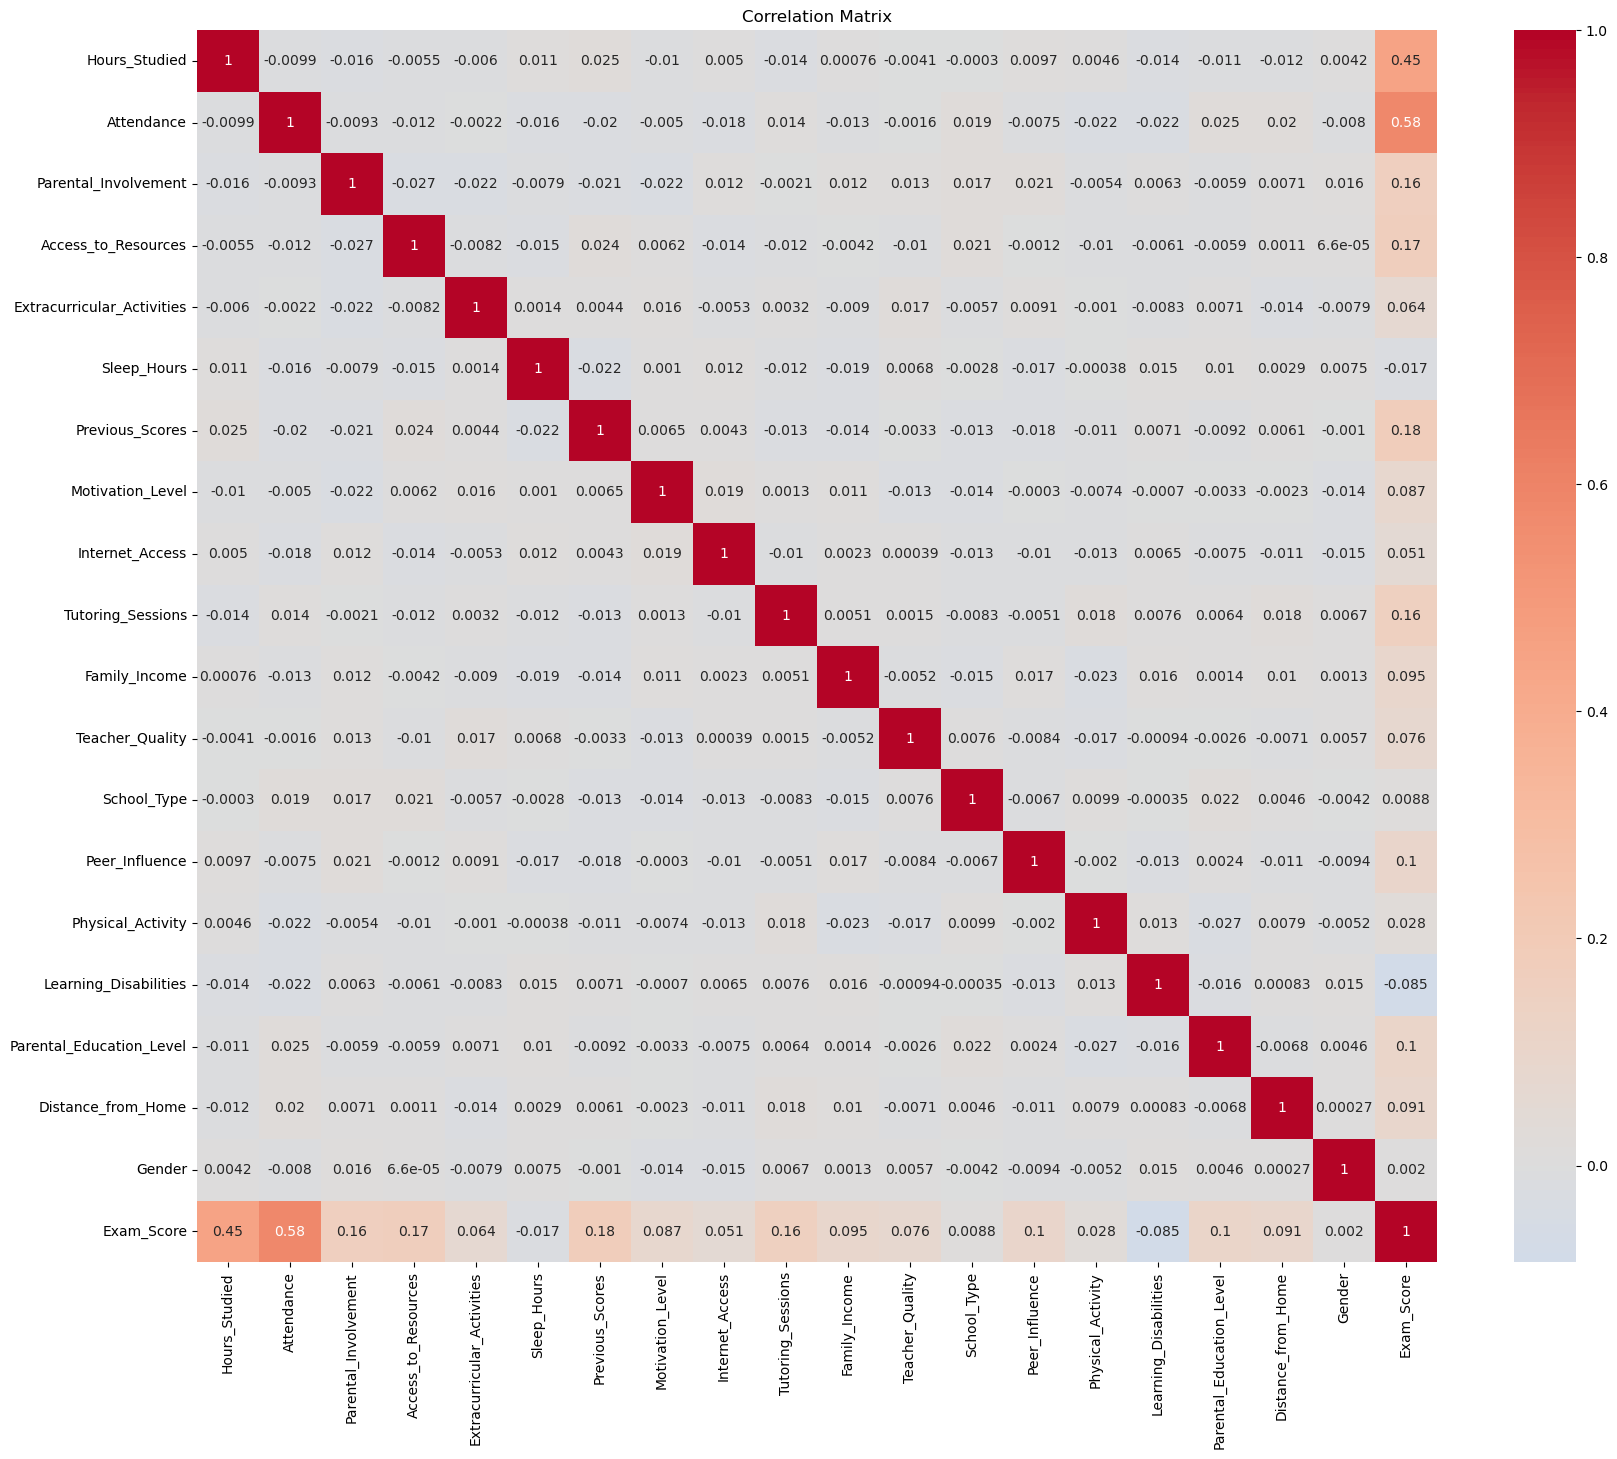

In [82]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=False)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [72]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

Attendance                Exam_Score    0.581072
Hours_Studied             Exam_Score    0.445455
Previous_Scores           Exam_Score    0.175079
Access_to_Resources       Exam_Score    0.169770
Parental_Involvement      Exam_Score    0.157114
Tutoring_Sessions         Exam_Score    0.156525
Parental_Education_Level  Exam_Score    0.101940
Peer_Influence            Exam_Score    0.100217
Family_Income             Exam_Score    0.094555
Distance_from_Home        Exam_Score    0.091110
dtype: float64

In [73]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

Attendance                Exam_Score    0.581072
Hours_Studied             Exam_Score    0.445455
Previous_Scores           Exam_Score    0.175079
Access_to_Resources       Exam_Score    0.169770
Parental_Involvement      Exam_Score    0.157114
Tutoring_Sessions         Exam_Score    0.156525
Parental_Education_Level  Exam_Score    0.101940
Peer_Influence            Exam_Score    0.100217
Family_Income             Exam_Score    0.094555
Distance_from_Home        Exam_Score    0.091110
dtype: float64

In [74]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(15)

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

Exam_Score  Attendance                    0.581072
            Hours_Studied                 0.445455
            Previous_Scores               0.175079
            Access_to_Resources           0.169770
            Parental_Involvement          0.157114
            Tutoring_Sessions             0.156525
            Parental_Education_Level      0.101940
            Peer_Influence                0.100217
            Family_Income                 0.094555
            Distance_from_Home            0.091110
            Motivation_Level              0.086937
            Teacher_Quality               0.076387
            Extracurricular_Activities    0.064382
            Internet_Access               0.051475
            Physical_Activity             0.027824
dtype: float64


In [75]:
# x_key -> data for x axis, y_key -> data for y axis, c_key data for color
# Set color stuff i change change lng and map values kay ugly

def color_data(c_key):
    color_map = {3:'green',2:'yellow',1:'blue',0:'red',float('nan'):'black'}
    colors = None   # No color mapping in case invalid ang c_key
    if c_key in data.keys():
        if c_key in ENUMDATA:
            colors = data[c_key].map(color_map) # if data is enum get colors from map
        else:
            colors = c_key                      # if data already numerical get colors from gradient
    return colors

Slope: 0.28929062860968324       Intercept: 61.45698360950434


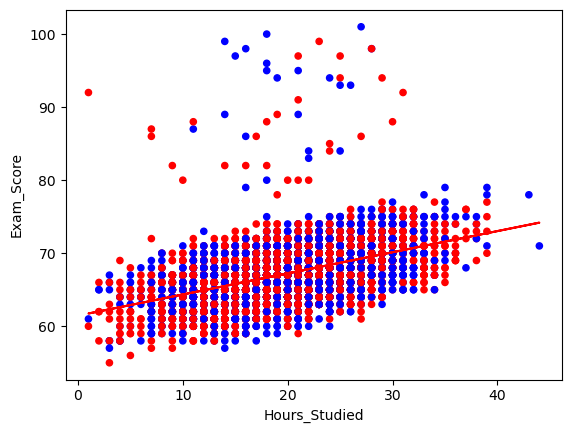

In [76]:
# Visualization Scatter Plot with Regresion
y_key = "Exam_Score"
c_key = "Gender"
x_key = "Hours_Studied"

#Draw Scatter Plot
data.plot(kind="scatter",x=x_key,y=y_key,c=color_data(c_key))

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: 0.0007960504026209089       Intercept: 2.9517087416397962


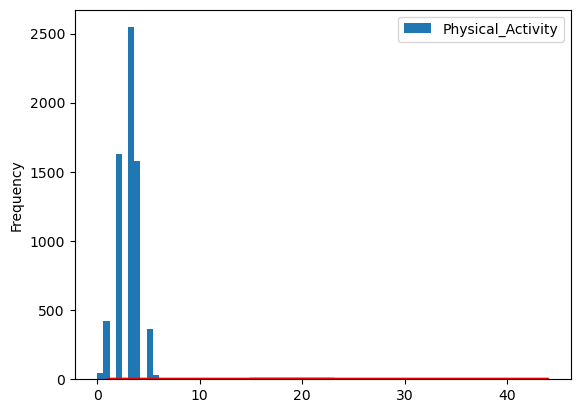

In [77]:
# Visualization Scatter Plot with Regresion
y_key = "Physical_Activity"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: -0.0018682715767054786       Intercept: 2.1237428300105177


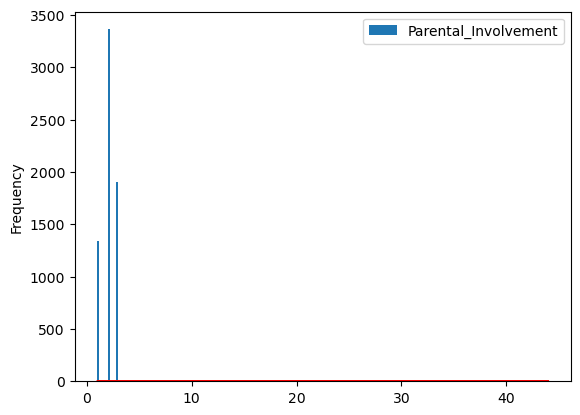

In [78]:

# Visualization Scatter Plot with Regresion
y_key = "Parental_Involvement"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

<Figure size 800x600 with 0 Axes>

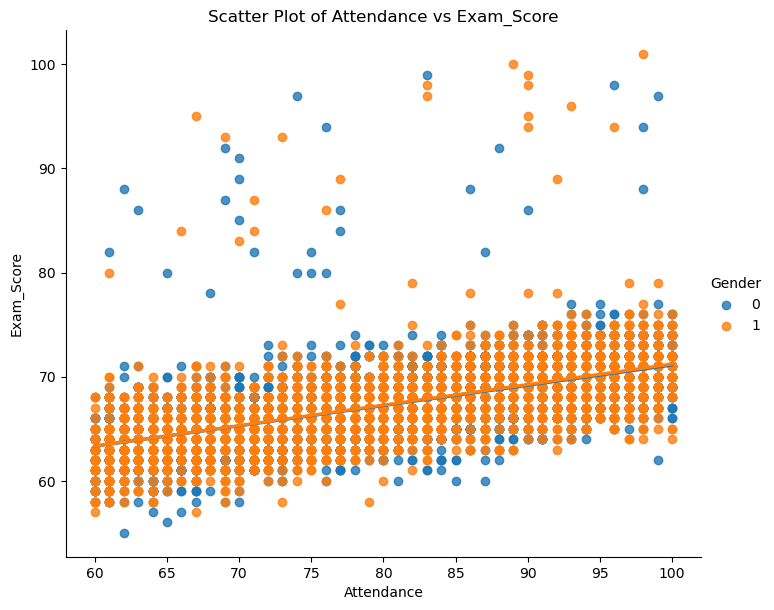

<Figure size 800x600 with 0 Axes>

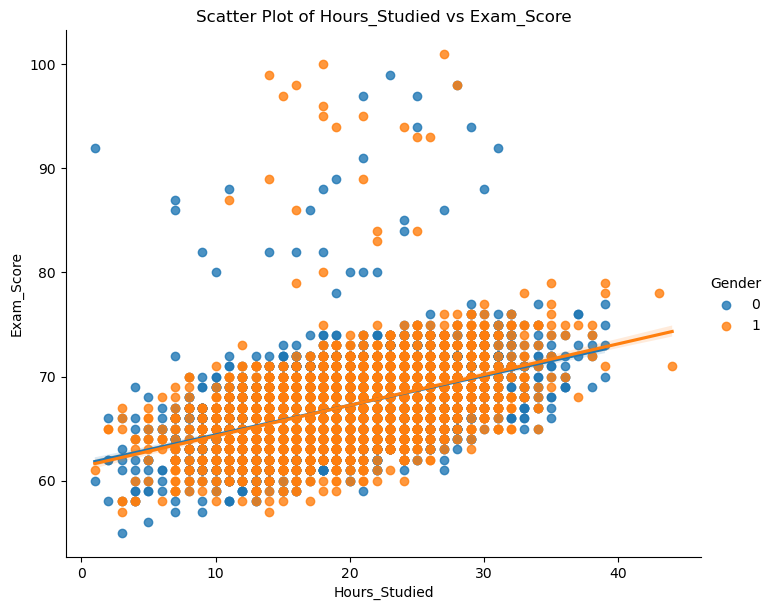

<Figure size 800x600 with 0 Axes>

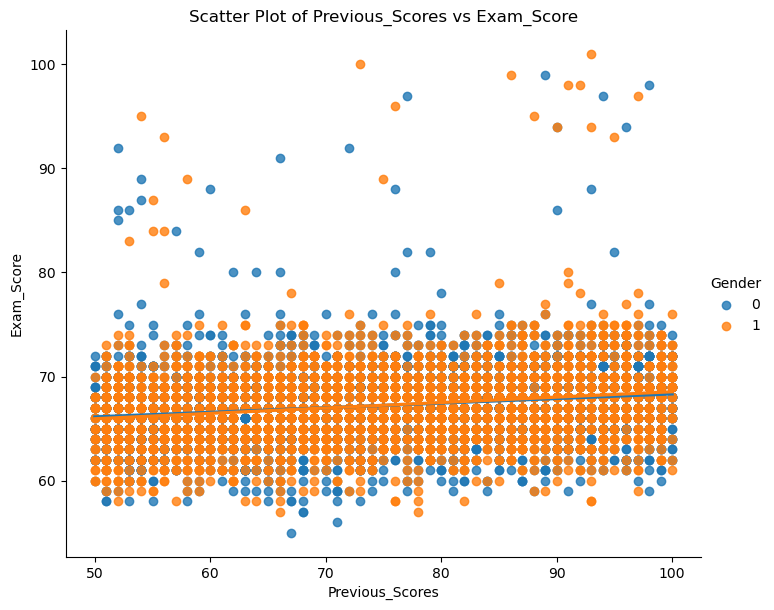

<Figure size 800x600 with 0 Axes>

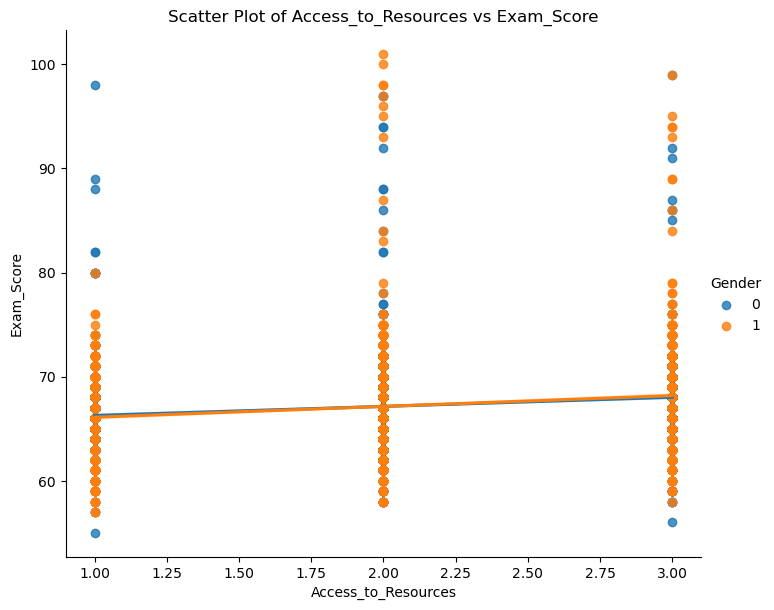

<Figure size 800x600 with 0 Axes>

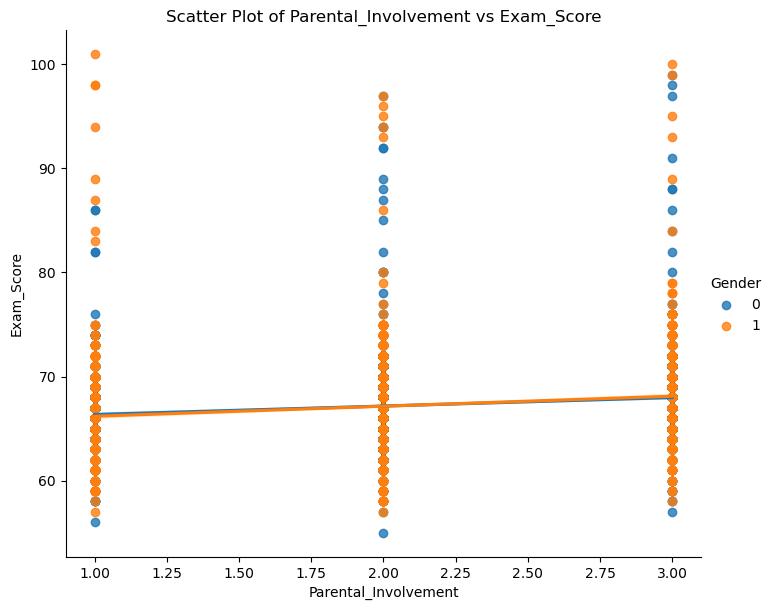

<Figure size 800x600 with 0 Axes>

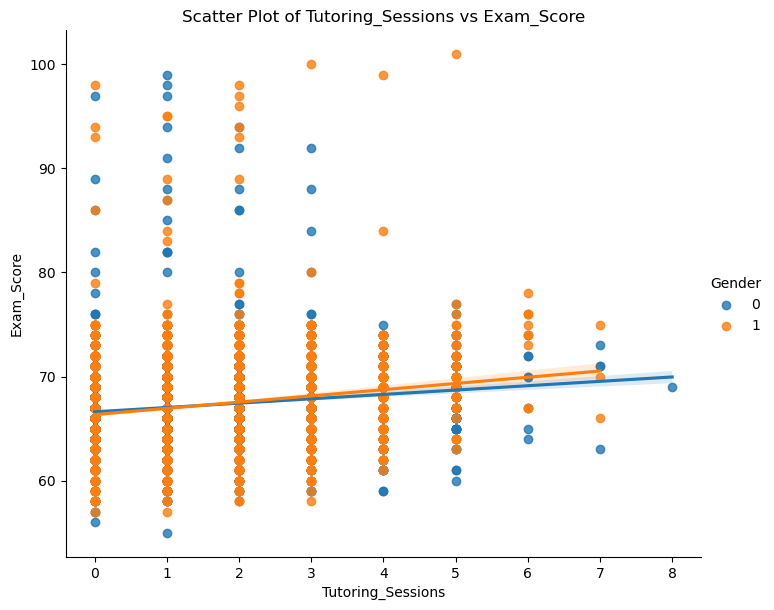

<Figure size 800x600 with 0 Axes>

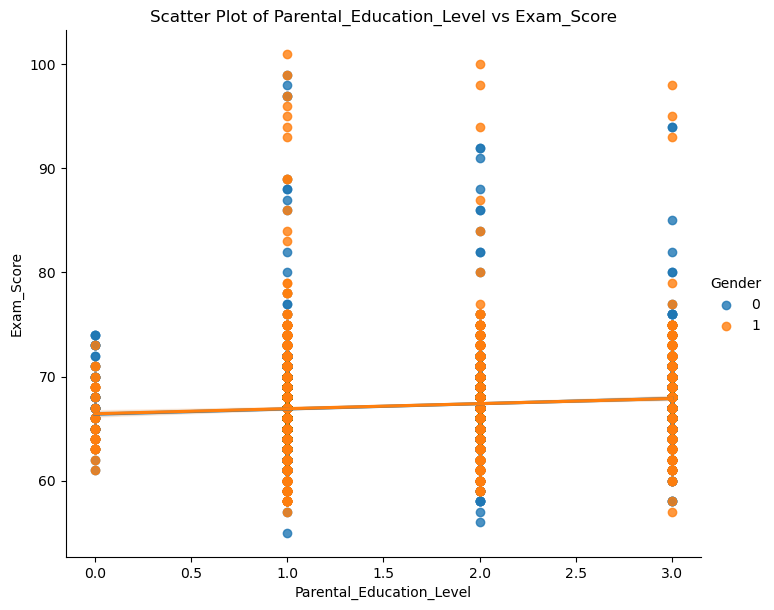

<Figure size 800x600 with 0 Axes>

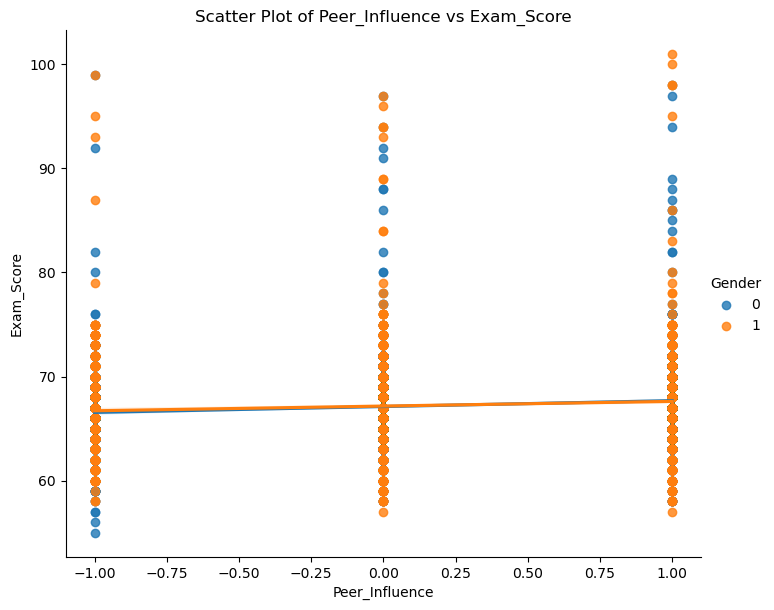

<Figure size 800x600 with 0 Axes>

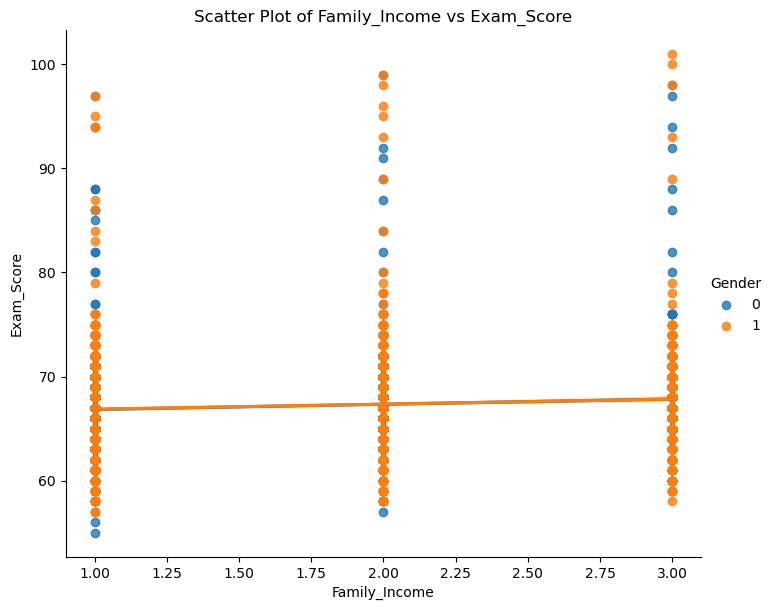

<Figure size 800x600 with 0 Axes>

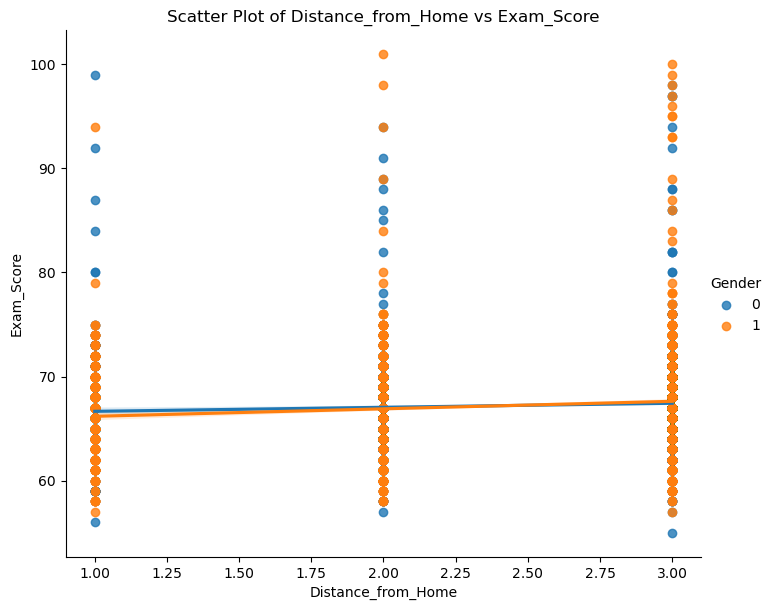

<Figure size 800x600 with 0 Axes>

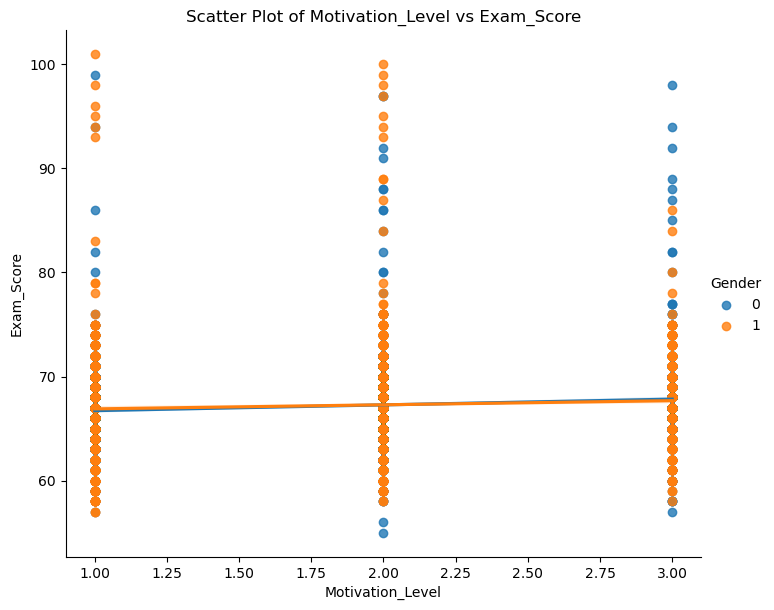

<Figure size 800x600 with 0 Axes>

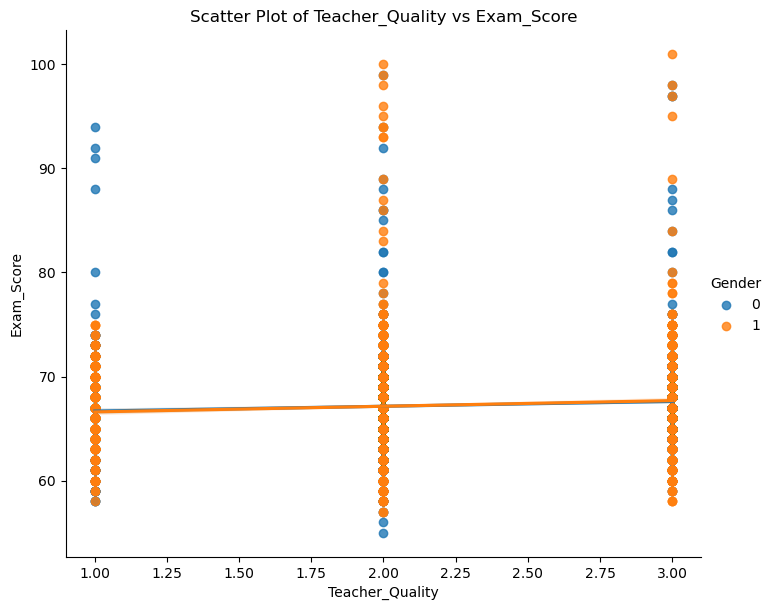

<Figure size 800x600 with 0 Axes>

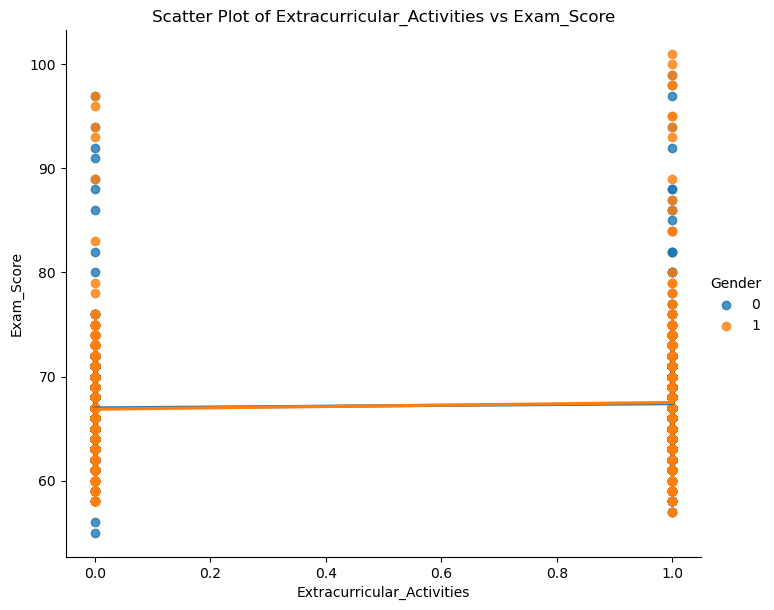

<Figure size 800x600 with 0 Axes>

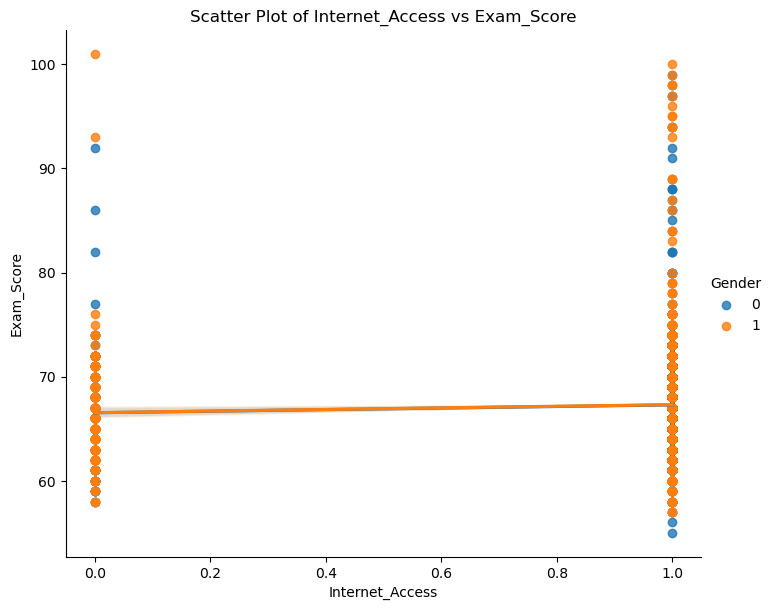

<Figure size 800x600 with 0 Axes>

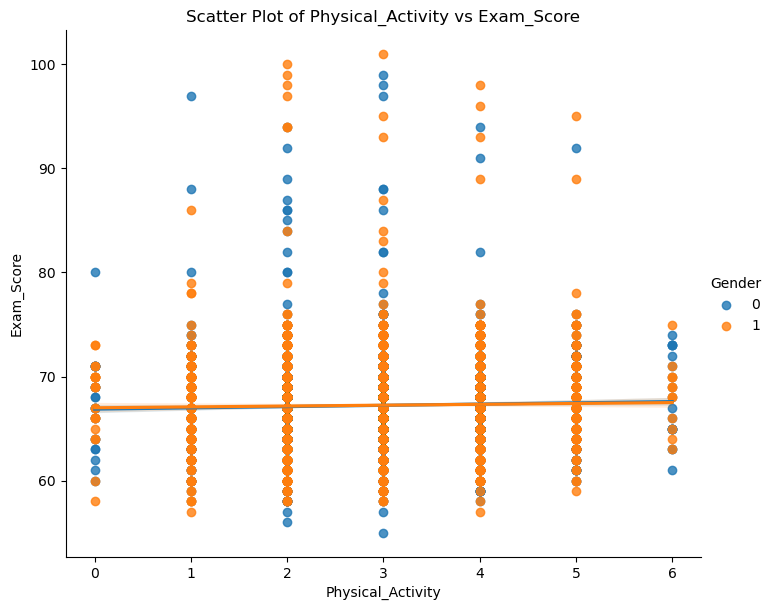

In [79]:

# Column to use for coloring the scatter plots
hue_column = 'Gender'

# Create scatter plots with regression lines for each pair
for (var2, var1) in sorted_pairs.index:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

<Figure size 800x600 with 0 Axes>

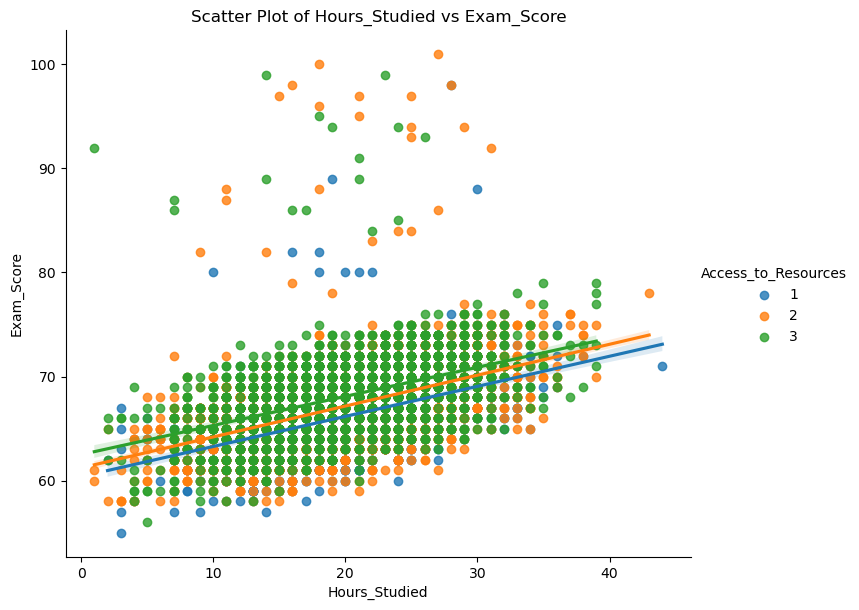

In [80]:
# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create scatter plots with regression lines for each pair
for (var2, var1) in [("Exam_Score", "Hours_Studied")]:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

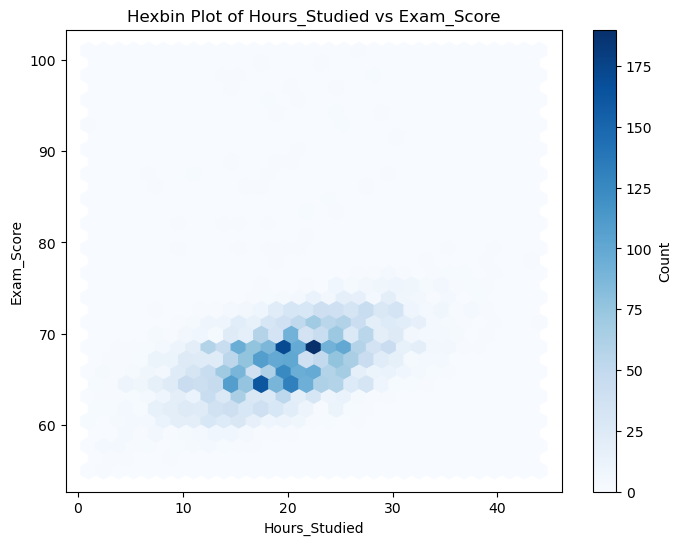

In [81]:

# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create hexbin plots for each pair
for (var2, var1) in [("Exam_Score", "Hours_Studied")]:
    plt.figure(figsize=(8, 6))
    plt.hexbin(data[var1], data[var2], gridsize=30, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title(f'Hexbin Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

Histogram of Physical_Activity


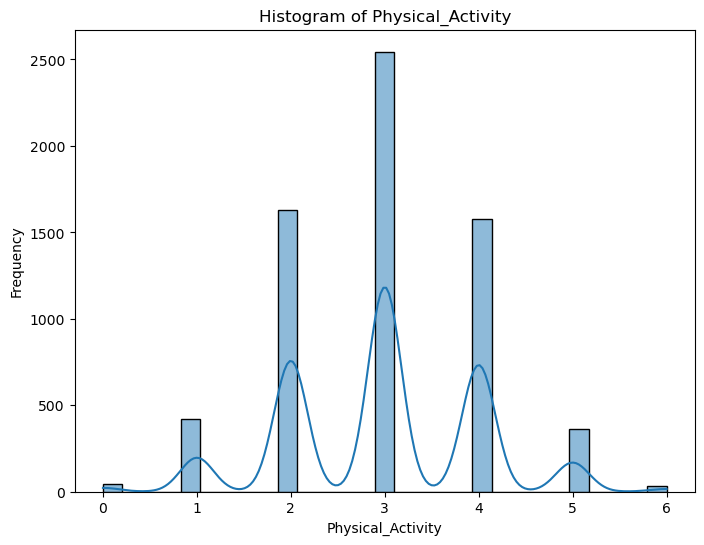

Histogram of Tutoring_Sessions


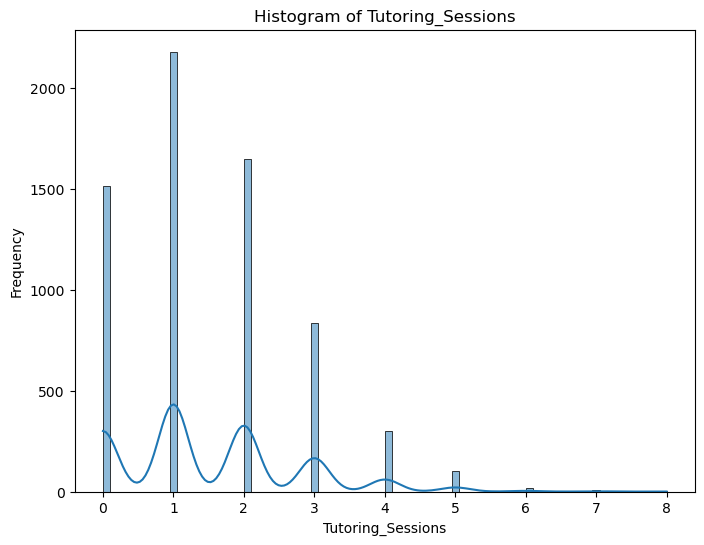

Histogram of Parental_Involvement


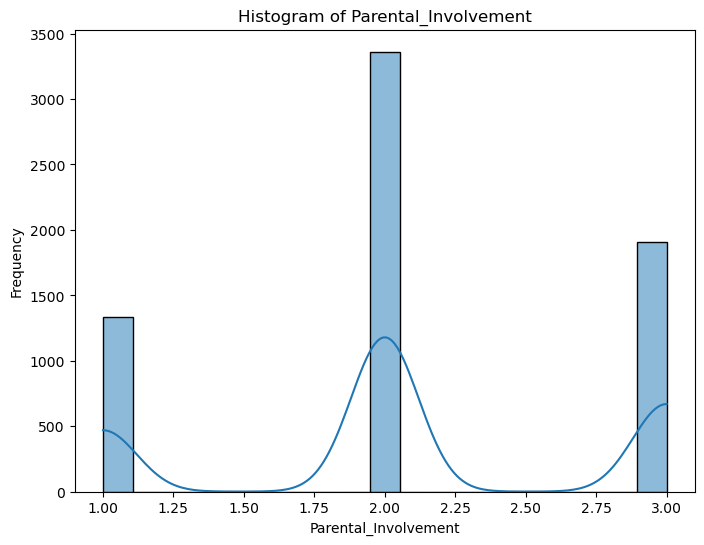

Histogram of Internet_Access


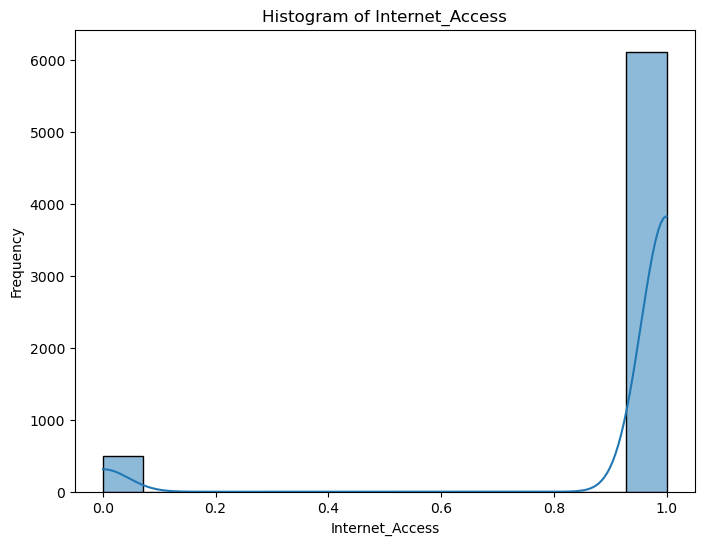

Histogram of Motivation_Level


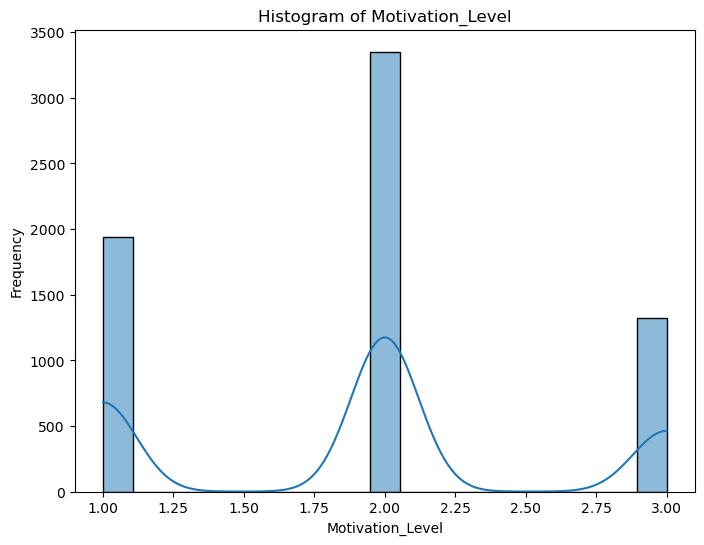

Histogram of Family_Income


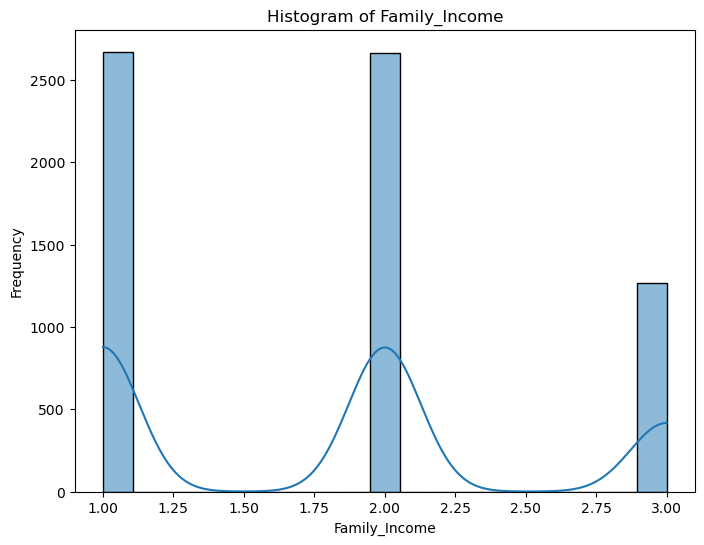

Histogram of Access_to_Resources


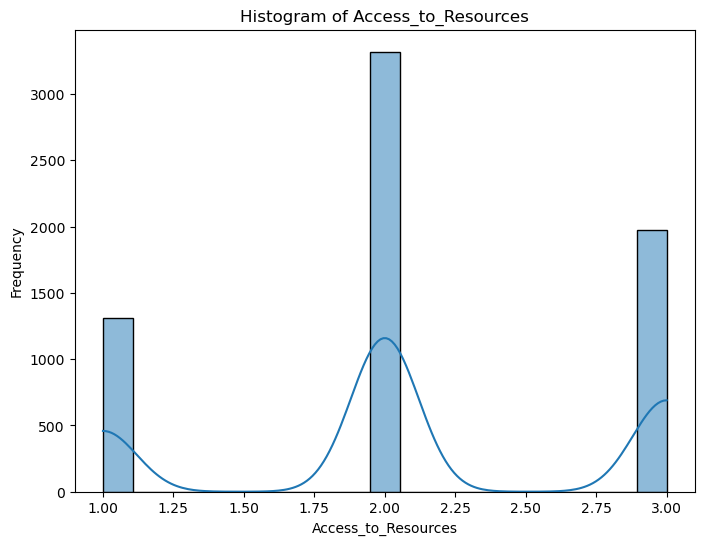

Histogram of Previous_Scores


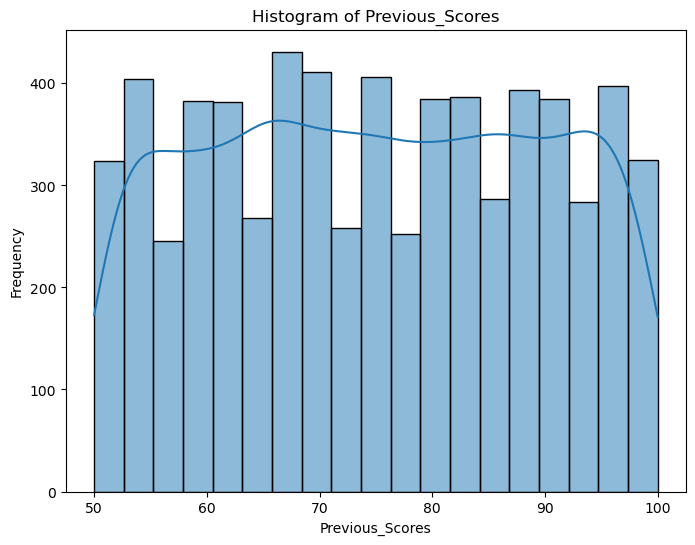

Histogram of Exam_Score


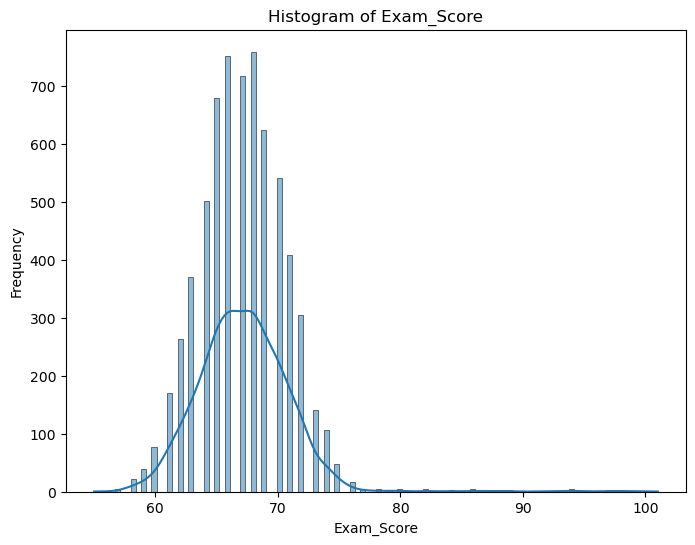

Histogram of Distance_from_Home


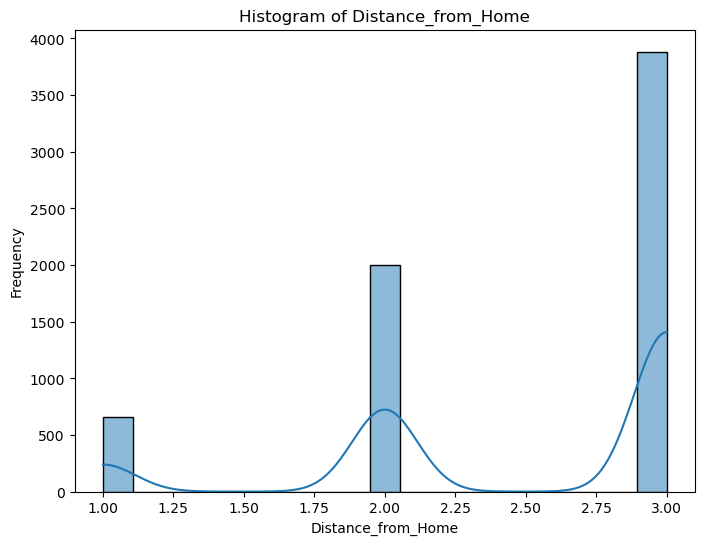

Histogram of Extracurricular_Activities


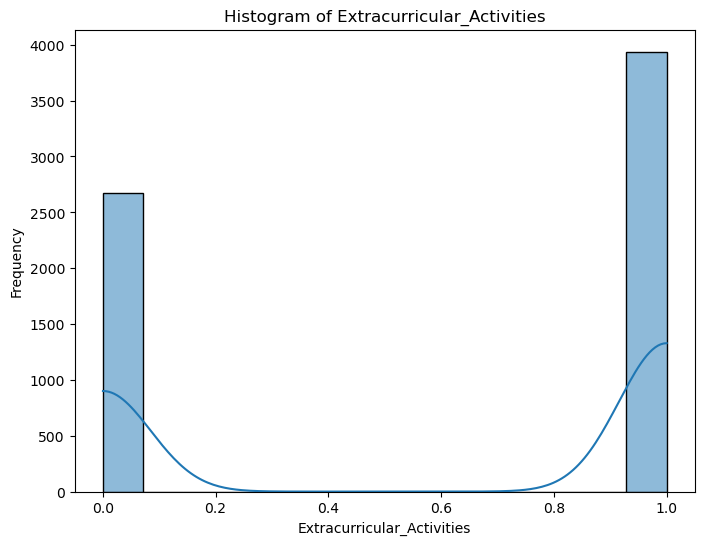

Histogram of Hours_Studied


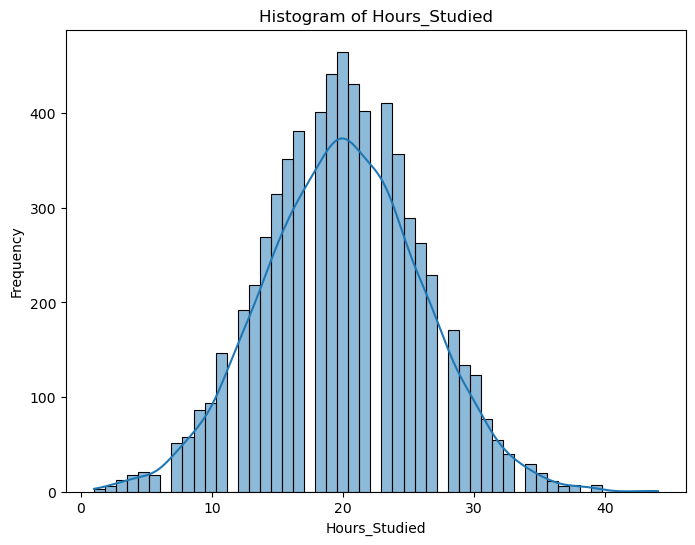

Histogram of Teacher_Quality


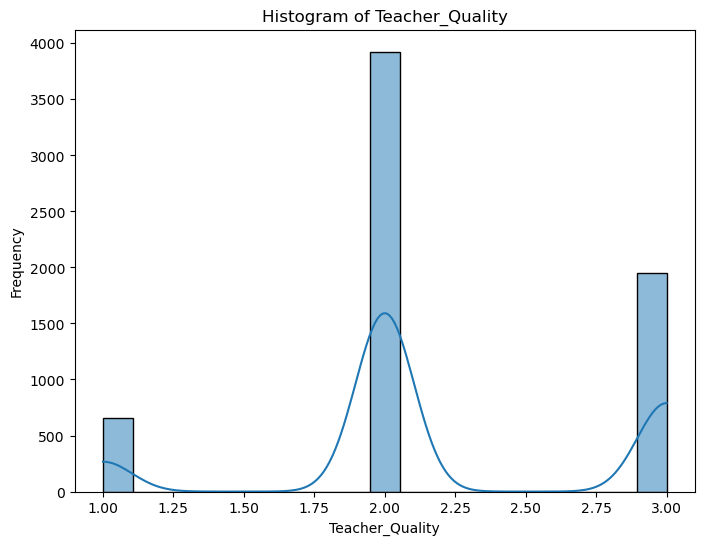

Histogram of Attendance


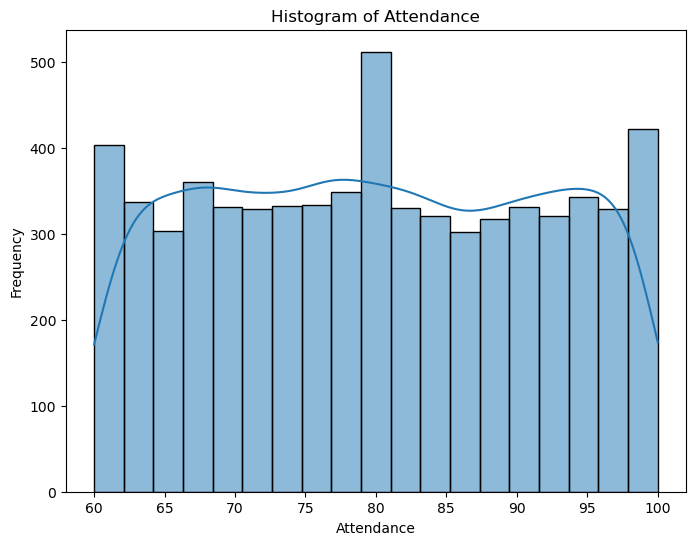

Histogram of Peer_Influence


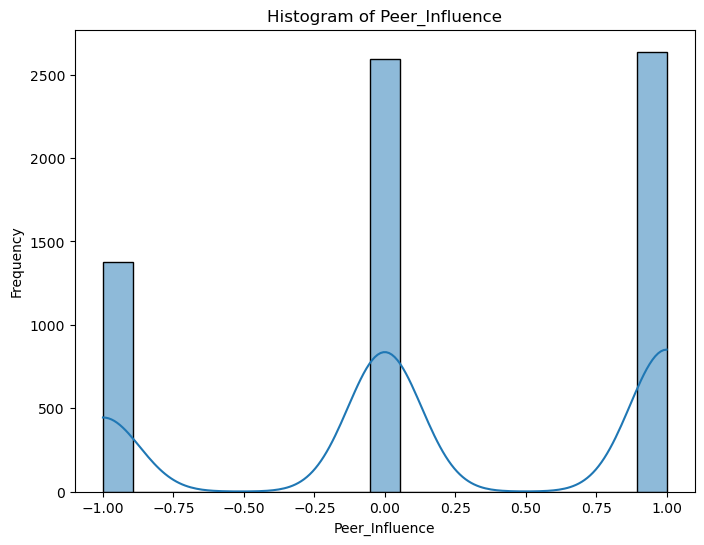

Histogram of Parental_Education_Level


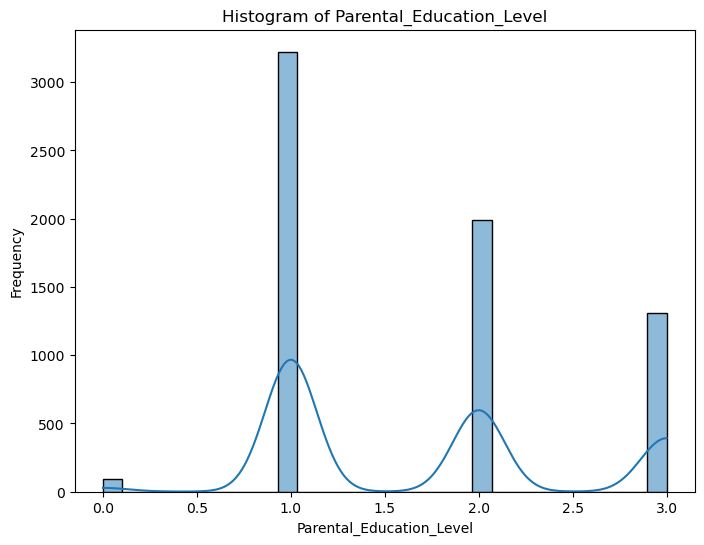

In [89]:
# Create histograms for each variable in the top correlated pairs
variables = set([var for pair in sorted_pairs.index for var in pair])

for var in variables:
    print(f"Histogram of {var}")
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()